# Sequence Prediction with Recurrent Neural Network

### RNN Example with Keras SimpleRNN

Recurrent Neural Network models can be easily built in a Keras API. We'll learn how to build an RNN model with a keras SimpleRNN() layer. SimpleRNN is a Fully-connected RNN where the output is to be fed back to input. 

***In this notebook we solve a sequence prediction problem with RNN.***

### We need to perform the following steps:

##### Generating sample dataset

##### Preparing data (reshaping)

##### Building a model with SimpleRNN

##### Predicting and plotting results


We'll start by loading the required libraries.

## Load Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, SimpleRNN

## Generating sample dataset

We'll generate simple sequence data.

In [ ]:
# Number of data points
N = 10000    

# Number of data points to be used in training
Tp = 8000    

t=np.arange(0,N)
x=np.sin(0.02*t)+2*np.random.rand(N)
df = pd.DataFrame(x)
df.head()

,0
0,1.385530
1,2.009118
2,1.759878
3,1.407066
4,0.108558


In [ ]:
df.info

<bound method DataFrame.info of              0
0     1.385530
1     2.009118
2     1.759878
3     1.407066
4     0.108558
...        ...
9995  0.099093
9996  0.609278
9997  0.080405
9998 -0.109674
9999 -0.635779

[10000 rows x 1 columns]>

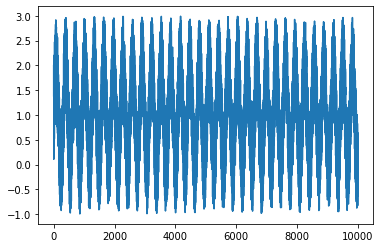

In [ ]:
plt.plot(df)
plt.show()

## Split Data into Training and Test Set

In [ ]:
values = df.values
train, test = values[0:Tp,:], values[Tp:N,:]

In [ ]:
train.shape

(8000, 1)

In [ ]:
train

array([[1.3855302 ],
       [2.00911763],
       [1.759878  ],
       ...,
       [1.21642683],
       [1.783548  ],
       [1.93798423]])

In [ ]:
test.shape

(2000, 1)

## Preparing Data (Reshaping)

RNN model requires a step value that contains the number of elements present in an input sequence. 

Here, we define it as a '**step**'. 

This is an important part of RNN so let's see an example:

x has the following sequence data.

x = [1,2,3,4,5,6,7,8,9,10]

for step=1, 
x input and its y prediction become:

x ----------  y

1 ---------- 2

2 ---------- 3

3 ----------  4

4 ---------- 5

..

9 ---------- 10


for step = 3, 
x and y contain:

x  ----------------- y

1,2,3 ---------- 4

2,3,4 ---------- 5

3,4,5 ---------- 6

4,5,6 ---------- 7

...

7,8,9 ---------- 10


As you have noticed the sizes of x input and y output become different. 
We'll fix it by adding **step** size into the training and test data.

In [ ]:
# Set the sequence step as 4 
step = 4

### Reformat the Data to incorporate the Sequence Structure in the input

In [ ]:
train

array([[1.3855302 ],
       [2.00911763],
       [1.759878  ],
       ...,
       [1.21642683],
       [1.783548  ],
       [1.93798423]])

In [ ]:
# Last value of the data
train[-1,]

array([1.93798423])

In [ ]:
# Add step elements into train and test
# Repeat the last value 'step' number of times and append at the end of the existing data
train = np.append(train, np.repeat(train[-1,], step)) 
test = np.append(test, np.repeat(test[-1,], step))

In [ ]:
type(train)

numpy.ndarray

In [ ]:
train.shape

(8004,)

In [ ]:
train

array([1.3855302 , 2.00911763, 1.759878  , ..., 1.93798423, 1.93798423,
       1.93798423])

Next, we'll convert test and train data into the matrix with step value as it has been shown in the above example.

In [ ]:
# Convert data into Train and Test Sequences
# convert into dataset matrix
def convertToMatrix(data, step):
 X, Y =[], []
 for i in range(len(data)-step):
  d = i + step  
  X.append(data[i:d,])
  Y.append(data[d,])
 return np.array(X), np.array(Y)

In [ ]:
trainX, trainY = convertToMatrix(train,step)
testX, testY = convertToMatrix(test,step)

In [ ]:
trainX.shape

(8000, 4)

In [ ]:
trainY.shape

(8000,)

In [ ]:
trainX

array([[1.3855302 , 2.00911763, 1.759878  , 1.40706613],
       [2.00911763, 1.759878  , 1.40706613, 0.10855828],
       [1.759878  , 1.40706613, 0.10855828, 0.99300598],
       ...,
       [1.21642683, 1.783548  , 1.93798423, 1.93798423],
       [1.783548  , 1.93798423, 1.93798423, 1.93798423],
       [1.93798423, 1.93798423, 1.93798423, 1.93798423]])

### Reshape in the way required by a Keras RNN Model

Finally, we'll reshape trainX and testX to fit with the Keras model. 

RNN model requires three-dimensional input data. You can see the shape of testX below.

In [ ]:
# Total number of sampls x one sample at a time x sequence length for one sample
trainX = np.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = np.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

trainX.shape

(8000, 1, 4)

In [ ]:
trainX[0]

array([[1.3855302 , 2.00911763, 1.759878  , 1.40706613]])


### Build the RNN Model with SimpleRNN

Next, we create the keras Sequential model.

In [ ]:
# SimpleRNN model
model = Sequential()

# num_units = no of hidden units = output dimension
# units = Positive integer, dimensionality of the output space.    
# Numer of parameters
# num_params = [(num_units + input_dim + 1) * num_units]  

#model.add(SimpleRNN(units=32, input_shape=(1,step), activation="relu"))
model.add(SimpleRNN(units=32, input_length =1, input_dim=step, activation="relu"))

model.add(Dense(8, activation="relu")) 
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='rmsprop')
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_3 (SimpleRNN)     (None, 32)                1184      
_________________________________________________________________
dense_6 (Dense)              (None, 8)                 264       
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 9         
Total params: 1,457
Trainable params: 1,457
Non-trainable params: 0
_________________________________________________________________


### Train the RNN

We'll fit model with the training data.

In [ ]:
# Train the Model
model.fit(trainX, trainY, epochs=100, batch_size=16, verbose=2)


Epoch 1/100
500/500 - 1s - loss: 0.4301
Epoch 2/100
500/500 - 0s - loss: 0.3993
Epoch 3/100
500/500 - 0s - loss: 0.3972
Epoch 4/100
500/500 - 0s - loss: 0.3954
Epoch 5/100
500/500 - 0s - loss: 0.3938
Epoch 6/100
500/500 - 0s - loss: 0.3925
Epoch 7/100
500/500 - 0s - loss: 0.3914
Epoch 8/100
500/500 - 0s - loss: 0.3894
Epoch 9/100
500/500 - 0s - loss: 0.3886
Epoch 10/100
500/500 - 0s - loss: 0.3872
Epoch 11/100
500/500 - 1s - loss: 0.3860
Epoch 12/100
500/500 - 0s - loss: 0.3855
Epoch 13/100
500/500 - 0s - loss: 0.3848
Epoch 14/100
500/500 - 0s - loss: 0.3842
Epoch 15/100
500/500 - 0s - loss: 0.3839
Epoch 16/100
500/500 - 0s - loss: 0.3834
Epoch 17/100
500/500 - 0s - loss: 0.3820
Epoch 18/100
500/500 - 0s - loss: 0.3823
Epoch 19/100
500/500 - 0s - loss: 0.3820
Epoch 20/100
500/500 - 0s - loss: 0.3813
Epoch 21/100
500/500 - 0s - loss: 0.3813
Epoch 22/100
500/500 - 0s - loss: 0.3805
Epoch 23/100
500/500 - 0s - loss: 0.3805
Epoch 24/100
500/500 - 0s - loss: 0.3799
Epoch 25/100
500/500 - 0s

## Make Prediction on both Training and Test Data

In [ ]:
# Predict on the Training Set
trainPredict = model.predict(trainX)

# Predict on the Test Set
testPredict = model.predict(testX)

# Concetenate the results of the Training and Test Sets
predicted = np.concatenate((trainPredict, testPredict), axis=0)


### Check the Loss

Next, we'll check the loss

In [ ]:
trainScore = model.evaluate(trainX, trainY, verbose=0)
print(trainScore)

0.36918506026268005


In [ ]:
testScore = model.evaluate(testX, testY, verbose=0)
print(testScore)

0.39423540234565735


### Plot the Results

In [ ]:
df

,0
0,1.385530
1,2.009118
2,1.759878
3,1.407066
4,0.108558
...,...
9995,0.099093
9996,0.609278
9997,0.080405
9998,-0.109674


Finally, we check the result in a plot. A vertical line in a plot identifies a splitting point between the training and the test part.


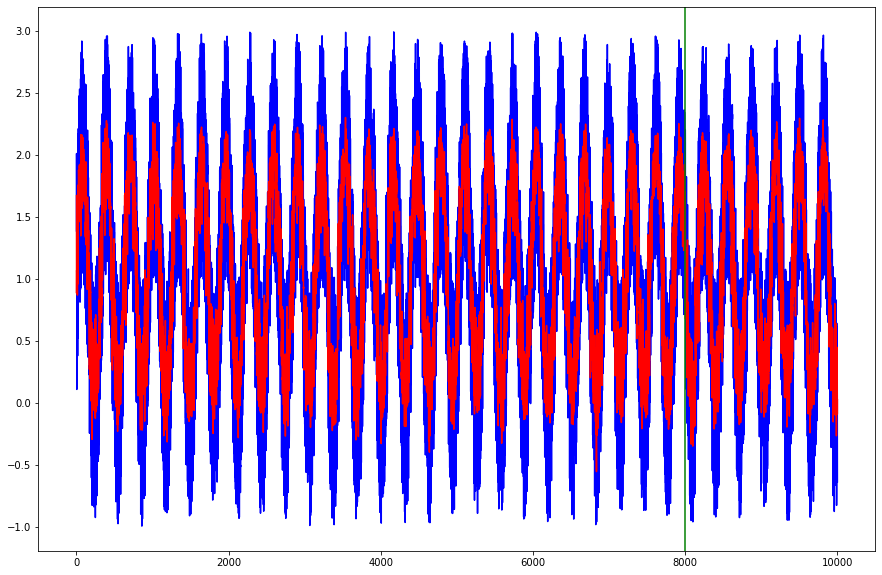

In [ ]:
plt.figure(figsize=(15,10))
index = df.index.values
# Actual timeseries values
plt.plot(index, df[0], c='b')
# Predicted values by the RNN
plt.plot(index, predicted, c='r')
# Train/Test demarcation
plt.axvline(df.index[Tp], c="g")
plt.show() 